# Import needed Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import preprocessing
from scipy import stats
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
%matplotlib inline
from sklearn.linear_model import Lasso, Ridge, LinearRegression

# Accessing Data

In [2]:
# import the data. Make an original copy that does not get touched
df_original = pd.read_csv('home_data.csv.zip')

In [3]:
# make a copy of DF and work on that.
df = df_original.copy()

# Feature Selection

In [62]:
# I want to find my target vairable and possible features
df.columns


Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'view', 'condition', 'sqft_basement', 'yr_built', 'lat', 'long'],
      dtype='object')

In [5]:

df_original.shape

(21613, 21)

In [6]:
# target is the price
# some features will be 'bedrooms', 'bathrooms', 'sqft_living', floors' view, yr_renovated, zipcode, 'condition', sqft_basement'


In [7]:
# drop unnesecarry columns
#df = df.drop(['sqft_living15', 'sqft_lot15','sqft_above','date','waterfront','yr_renovated' ,'view','sqft_basement'], axis = 1)

In [8]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Data Cleaning

In [9]:
df.drop(['id', 'date', 'waterfront', 'yr_renovated','zipcode', 'sqft_living15','sqft_lot15', 'grade', 'sqft_above'],axis=1, inplace =True)

In [61]:
df['floors'].value_counts()

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

In [11]:
# log the column to make it normal
#df['sqft_living'] = np.log(df['sqft_living'])

In [12]:
# #make a dataframe of the features you will use

# features_df = df[['bedrooms', 'bathrooms', 'sqft_living',
#        'floors', 'condition', 'yr_built']]

In [13]:
#features_df.head()

In [14]:
# target_df = pd.DataFrame(df['price'])
# target_df.shape

In [15]:
X = df.drop('price', axis=1)
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,sqft_basement,yr_built,lat,long
0,3,1.00,1180,5650,1.0,0,3,0,1955,47.5112,-122.257
1,3,2.25,2570,7242,2.0,0,3,400,1951,47.7210,-122.319
2,2,1.00,770,10000,1.0,0,3,0,1933,47.7379,-122.233
3,4,3.00,1960,5000,1.0,0,5,910,1965,47.5208,-122.393
4,3,2.00,1680,8080,1.0,0,3,0,1987,47.6168,-122.045


In [16]:
# scale the features using Z scores. 
# filter out any rows with an absolute value of Zscore over 2.5

# feature_z_scores_df = pd.DataFrame(stats.zscore(df), columns = df.columns)
# no_outliers_z_df =  feature_z_scores_df[(np.abs(feature_z_scores_df) <= 2.5).all(axis=1)]

In [17]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

# Feature Scaling

In [63]:
# I am Scaling the features to remove outliers
from sklearn.preprocessing import StandardScaler
from scipy import stats

ss = StandardScaler()

X_SS = pd.DataFrame(ss.fit_transform(X))
X_SS.set_index(X.index, inplace=True)
X_SS.columns = X.columns
# # Remove outliers, i.e. data points outside of 2.5 standard deviations of the mean
X_SS = X_SS[(np.abs(stats.zscore(X_SS)) < 2.5).all(axis=1)]
X_SS.shape

(16165, 11)

In [64]:
# after removing the outliers, I joined my target variable with my features
no_outliers_z_df = X_SS.join(df['price'], how = 'left')
no_outliers_z_df.shape

(16165, 12)

In [20]:
# This is the Mean house price of the midwest.
no_outliers_z_df['price'].mean()

493159.81198865495

In [65]:
# setting variables so I can start to model soon

X = X_SS
y= no_outliers_z_df['price']



In [66]:
# With a train test split we are split the data into training groups(80% of data) and test groups(20% of Data)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .2, random_state=1)

In [23]:
#no_outliers_z_df.isna().sum()
lasso = Lasso() # Lasso is also known as the L1 norm 
lasso.fit(X_train, y_train)

print('Training r^2:', lasso.score(X_train, y_train))
print('Test r^2:', lasso.score(X_test, y_test))
print('Training MSE:', mean_squared_error(y_train, lasso.predict(X_train)))
print('Test MSE:', mean_squared_error(y_test, lasso.predict(X_test)))


Training r^2: 0.5952439150545723
Test r^2: 0.5990263257899787
Training MSE: 27656444399.682293
Test MSE: 26270352099.89997


In [24]:
lasso = Lasso(alpha=10) # Lasso is also known as the L1 norm 
lasso.fit(X_train, y_train)

print('Training r^2:', lasso.score(X_train, y_train))
print('Test r^2:', lasso.score(X_test, y_test))
print('Training MSE:', mean_squared_error(y_train, lasso.predict(X_train)))
print('Test MSE:', mean_squared_error(y_test, lasso.predict(X_test)))
print(lasso.coef_)

Training r^2: 0.5952438588738005
Test r^2: 0.5990353485468858
Training MSE: 27656448238.43964
Test MSE: 26269760961.338753
[-33282.07551326  41982.27824264 220144.54637313 -12126.36566832
   9886.08993192  46199.93210937  19552.36325726 -35481.79994717
 -49829.48085181  88882.72412033 -16794.1443246 ]


In [60]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,sqft_basement,yr_built,lat,long
0,221900,3,1.00,1180,5650,1.0,0,3,0,1955,47.5112,-122.257
1,538000,3,2.25,2570,7242,2.0,0,3,400,1951,47.7210,-122.319
2,180000,2,1.00,770,10000,1.0,0,3,0,1933,47.7379,-122.233
3,604000,4,3.00,1960,5000,1.0,0,5,910,1965,47.5208,-122.393
4,510000,3,2.00,1680,8080,1.0,0,3,0,1987,47.6168,-122.045


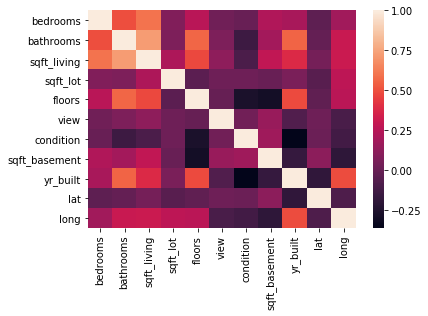

In [25]:
# drop sq_lot 15, sqFT_LIVING15, sqft_above, maybe grade
corr = X.corr() 
sns.heatmap(corr)

In [26]:
#make sure that rows that have NANs are the rows that were dropped from the features dataset which had outliers

#take training data and fit the model to it
#use that fitted model to predict training y values
#calc train MSE by using predicted training y values and actual y values

#use that fitted model to predict test y values
#calc test MSE by using predicted test y values and actual test y values
X_inter = sm.add_constant(X_train)
model = sm.OLS(y_train, X_inter).fit()
model.summary()

//anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     1959.
Date:                Wed, 12 Feb 2020   Prob (F-statistic):               0.00
Time:                        08:20:34   Log-Likelihood:            -1.9713e+05
No. Observations:               14667   AIC:                         3.943e+05
Df Residuals:                   14655   BIC:                         3.944e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.255e+05   1580.448    332.513      0.000    5.22e+05    5.29e+05
bedrooms      -3.332e+04   2059.458    -16.180      0.000   -3.74e+04   -2.93e+04
bathrooms      4.201e+04   2686.977     15.633      0.000    3.67e+04    4.73e+04
sqft_living    2.202e+05   3056.000     72.059      0.000    2.14e+05    2.26e+05
sqft_lot      -1.228e+04   5293.977     -2.320      0.020   -2.27e+04   -1905.125
floors         9869.5855   2305.789      4.280      0.000    5349.949    1.44e+04
view           4.623e+04   2668.197     17.326      0.000     4.1e+04    5.15e+04
condition      1.957e+04   1517.867     12.890      0.000    1.66e+04    2.25e+04
sqft_basement -3.553e+04   2144.892    -16.563      0.000   -3.97e+04   -3.13e+04
yr_built      -4.985e+04   2035.230    -24.495      0.000   -5.38e+04   -4.59e+04
lat            8.889e+04   1433.849     61.991      0.000    8.61e+04    9.17e+04
long           -1.68e+04   1901.575     -8.835      0.000   -2.05e+04   -1.31e+04
==============================================================================
Omnibus:                     7501.185   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           111373.734
Skew:                           2.104   Prob(JB):                         0.00
Kurtosis:                      15.827   Cond. No.                         6.49
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
# add constant column of ones in dataframe to provide coef for intercept
X_test = sm.add_constant(X_test)

#predict X_test values from fit model
model.predict(X_test)

18192    5.910440e+05
4685     7.440852e+05
14901    3.288893e+05
737      4.298829e+05
7930     2.269343e+05
16128    2.935062e+05
18249    5.749458e+05
1350     7.525183e+05
2780     6.870203e+05
21003    4.360828e+05
12409    2.861388e+05
18073    8.333250e+05
15555    1.878297e+05
5725     2.986430e+05
8220     1.963195e+05
16340    1.728943e+05
1012     6.548937e+05
3732     5.177101e+05
14017    3.728830e+05
2329     6.428006e+05
5663     3.013349e+05
9393     4.001681e+05
8893     4.579638e+05
3926     1.017077e+06
6497     3.597763e+05
7088     2.598566e+05
6411     4.623371e+05
19105    3.425811e+05
3496     8.815170e+05
9644     2.780947e+05
             ...     
10708    5.017235e+05
17612    4.594652e+05
8269     2.021743e+05
15130    7.242842e+05
16757    1.387891e+05
16419    4.537635e+05
19179    4.985647e+05
10005    3.156700e+05
9752     4.324290e+05
15396    2.370593e+05
14715    4.600042e+05
5413     2.674076e+05
2470     5.759518e+05
14519    4.821561e+05
20157    7

In [28]:
# add a constant column of ones for the coef of our intercept
X_train = sm.add_constant(X_train)

In [29]:
y_hat_train = model.predict(X_train)

In [30]:
# we are using the model to predict our X_test values
y_hat_test = model.predict(X_test)

In [31]:
# We are getting the MSE of the train and test data
train_mse =  mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test )

In [32]:
train_mse

27656444361.99453

In [33]:
test_mse

26270417276.047974

In [34]:
# I am making a sklearn object for linear regression so I can use it on Cross Val Score 
model = LinearRegression().fit(X,y)

In [35]:
# return the mean of cross_val_score done 5 times
np.mean(cross_val_score(model, X, y, cv = 5))

0.5921666021412879

In [36]:
y =np.reshape(y,-1,1)

In [37]:
y = pd.DataFrame(y)
y.head()

,price
0,221900
1,538000
2,180000
3,604000
4,510000


In [38]:
np.reshape(y.values, -1, 1)

array([221900, 538000, 180000, ..., 402101, 400000, 325000])

In [39]:
# We are doing a polynomial regression to see if we can improve the accuracy of our model
poly = PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(X)


poly_3 = PolynomialFeatures(degree = 3)
X_poly3 = poly_3.fit_transform(X) 


#make another predicion with poly
# then run the Cross Val and MSE

#keep reirtating the  degree in PolynomialFeatures
#poly_train_mse = None #mean_squared_error()
#poly_test_mse = None



In [40]:
# cross val 
X_poly.mean()

0.16145596541487686

In [41]:
X_poly3.mean()

0.00981056388633213

In [42]:
np.mean(cross_val_score(model, X_poly, y, cv=5))

0.6713759545713911

In [43]:
np.mean(cross_val_score(model, X_poly3, y, cv=10))

0.7545617633395525

In [44]:
#validate Model with ridge

In [45]:
ridge = Ridge(alpha = .5)
ridge.fit(X_train, y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [46]:
y_h_ridge_train = ridge.predict(X_train)
y_h_ridge_test = ridge.predict(X_test)
print(f'Train: {y_h_ridge_train.mean()}')
print(f'Test: {y_h_ridge_test.mean()}')



Train: 493000.9473648326
Test: 496214.944124259


In [47]:
no_outliers_z_df.shape

(18334, 12)

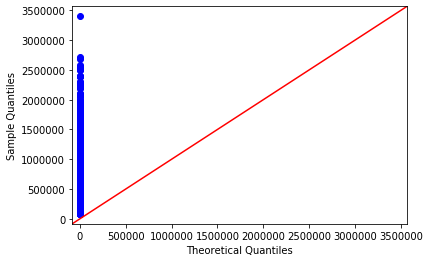

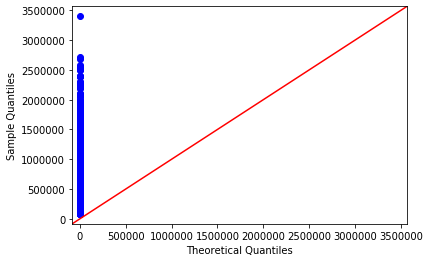

In [48]:
sm.qqplot(data = no_outliers_z_df['price'], line = '45')

In [49]:
no_outliers_z_df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,sqft_basement,yr_built,lat,long,price
0,-0.398737,-1.447464,-0.979835,-0.228321,-0.915427,-0.305759,-0.629187,-0.658681,-0.544898,-0.352572,-0.306079,221900
1,-0.398737,0.175607,0.533634,-0.189885,0.936506,-0.305759,-0.629187,0.245141,-0.681079,1.161568,-0.746341,538000
2,-1.473959,-1.447464,-1.426254,-0.123298,-0.915427,-0.305759,-0.629187,-0.658681,-1.293892,1.283537,-0.135655,180000
3,0.676485,1.149449,-0.130550,-0.244014,-0.915427,-0.305759,2.444294,1.397515,-0.204446,-0.283288,-1.271816,604000
4,-0.398737,-0.149007,-0.435422,-0.169653,-0.915427,-0.305759,-0.629187,-0.658681,0.544548,0.409550,1.199335,510000


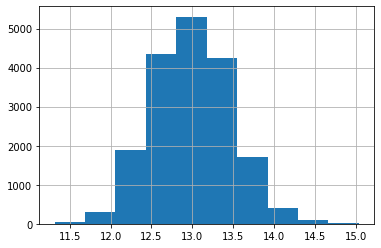

In [50]:
np.log(no_outliers_z_df['price']).hist()

In [51]:
no_outliers_z_df['price'].describe()

count    1.833400e+04
mean     4.931598e+05
std      2.603267e+05
min      8.200000e+04
25%      3.140000e+05
50%      4.350000e+05
75%      6.050000e+05
max      3.400000e+06
Name: price, dtype: float64

In [52]:
y_train.shape

(14667,)

In [53]:
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,sqft_basement,yr_built,lat,long
0,-0.398737,-1.447464,-0.979835,-0.228321,-0.915427,-0.305759,-0.629187,-0.658681,-0.544898,-0.352572,-0.306079
1,-0.398737,0.175607,0.533634,-0.189885,0.936506,-0.305759,-0.629187,0.245141,-0.681079,1.161568,-0.746341
2,-1.473959,-1.447464,-1.426254,-0.123298,-0.915427,-0.305759,-0.629187,-0.658681,-1.293892,1.283537,-0.135655
3,0.676485,1.149449,-0.130550,-0.244014,-0.915427,-0.305759,2.444294,1.397515,-0.204446,-0.283288,-1.271816
4,-0.398737,-0.149007,-0.435422,-0.169653,-0.915427,-0.305759,-0.629187,-0.658681,0.544548,0.409550,1.199335


In [54]:

#plt.plot(X, model.predict(X))

In [55]:
no_outliers_z_df.shape

(18334, 12)

In [56]:
no_outliers_z_df.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view',
       'condition', 'sqft_basement', 'yr_built', 'lat', 'long', 'price'],
      dtype='object')

In [57]:
df_original.shape

(21613, 21)